## **Implementation of Neural Networks Using a Object method "Class"**

## Neural Network using Pytorch

In [1]:
# Import necessary packages
import numpy as np
import torch
import torch.nn.functional as F
from torch import nn
import helper
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#1. Load the data: MNIST DataSet

In [ ]:
"""Define Transform to Normalize the Data & Apply the Transform to a DataSet"""
### Defining Transform to Normalize the Data **********************
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))
                                ])
### Then Download and apply this Transform to your dataset *********************
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform);

In [3]:
###  Load the training data and set the batch size **********************

trainloader= torch.utils.data.DataLoader(trainset, batch_size=64,shuffle=True)
dataiter = iter(trainloader)
images,labels = next(dataiter)
### Data type and Size
print('Data type:', type(images))
print('Images Size:', images.shape)
print('Labels Size:', labels.shape)

Data type: <class 'torch.Tensor'>
Images Size: torch.Size([64, 1, 28, 28])
Labels Size: torch.Size([64])


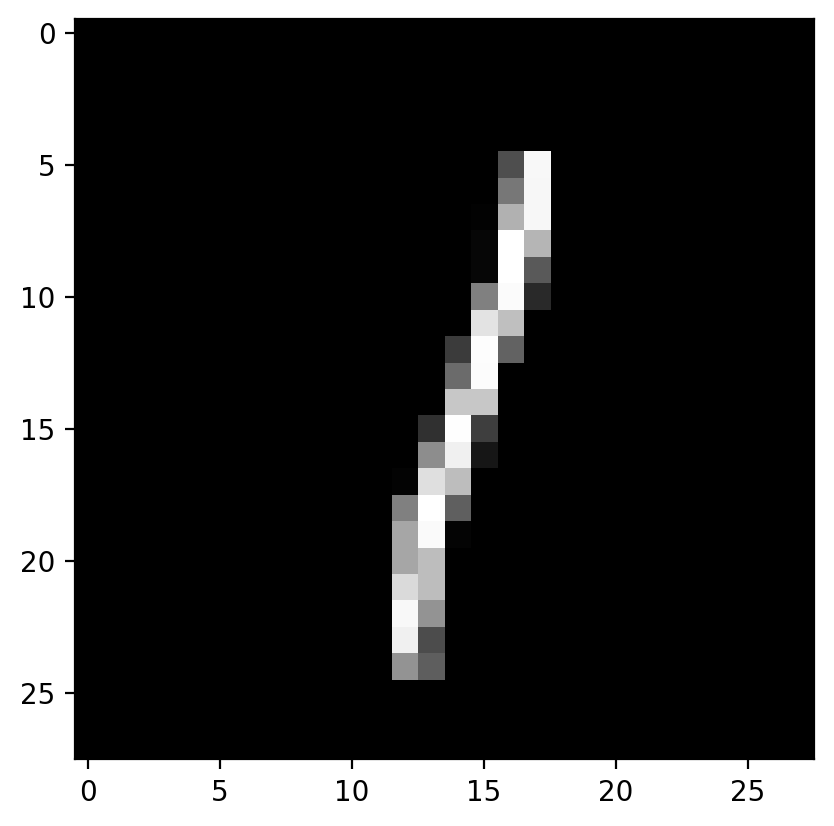

In [4]:
# Select one image from the batch and display
selected_image = images[0]
# Display the image
plt.imshow(selected_image.numpy().squeeze(), cmap='Greys_r')

#2. Build the Network

In [5]:
"""## Neural Networks of 784 inputs layer, 2 Hidden layers: of 256 to 128 and from 128 to 64 unites
and 10 outputs units"""

## Neural Network
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    ## fully-connected layer "fc"
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)
    ## Define the functions
    self.ReLU = nn.ReLU()
    self.softmax = nn.Softmax(dim=1)

  ## Define forward Method
  def forward(self, y):
    y = self.fc1(y)
    y = self.ReLU(y)
    y = self.fc2(y)
    y = self.ReLU(y)
    y = self.fc3(y)
    y = self.softmax(y)
    return y

## Pick up a manual seed for randomization
torch.manual_seed(41)
model2 = Network()

In [6]:
#print(model2.fc1.weight,'\n')
print(model2.fc3.bias)

Parameter containing:
tensor([ 0.0870, -0.0542, -0.1165,  0.1244, -0.1039,  0.0017,  0.0243,  0.1077,
         0.1149, -0.1091], requires_grad=True)


#3. Set the Criterion and Optimizer of the Model

In [7]:
from torch import optim
## Define the Loss
Criterion = nn.CrossEntropyLoss()
# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model2.parameters(), lr = 0.01):

#4. Start the Training: using for Loop

- Forward pass

- Calculate the loss

- Back propagation

In [8]:
## The for Loop function
epochs = 40
for e in range(epochs):
  running_loss = 0
  losses = []
  for images, labels in trainloader:
    ## Flatten the Images *****************
    image = images.view(images.shape[0], -1)

    optimizer.zero_grad()  # Clear the gradients

    ## Use forward fn to get a Prediction y_pred from x values
    # Logits = y_prediction *** Output
    y_prediction = model2.forward(image)
    ## Measure the Error/ Loss using Criterion as a fn of y_pred & x values
    Loss = Criterion(y_prediction, labels)

    ## Use Back Propagation to fine-tune the weights & biases
    Loss.backward()
    optimizer.step()       # Update steps
    running_loss = running_loss + Loss.item()
    losses.append(Loss.detach().numpy())

    # Calculate the average loss
    average_loss = torch.tensor(running_loss)/len(trainloader)
  else:
    if e % 10 == 0:
      print(f"Training loss: {average_loss}")

Training loss: 2.289419412612915
Training loss: 1.7076573371887207
Training loss: 1.556175947189331
Training loss: 1.5399409532546997


In [9]:
print(losses)

[array(1.5319223, dtype=float32), array(1.5329268, dtype=float32), array(1.5081255, dtype=float32), array(1.5130421, dtype=float32), array(1.5402722, dtype=float32), array(1.5169142, dtype=float32), array(1.5264461, dtype=float32), array(1.5296924, dtype=float32), array(1.5469433, dtype=float32), array(1.4950205, dtype=float32), array(1.5336329, dtype=float32), array(1.5010805, dtype=float32), array(1.5228146, dtype=float32), array(1.4808316, dtype=float32), array(1.5105292, dtype=float32), array(1.5221518, dtype=float32), array(1.5490671, dtype=float32), array(1.5081202, dtype=float32), array(1.5169843, dtype=float32), array(1.5332814, dtype=float32), array(1.4795635, dtype=float32), array(1.4762857, dtype=float32), array(1.5166227, dtype=float32), array(1.512847, dtype=float32), array(1.5920295, dtype=float32), array(1.4931355, dtype=float32), array(1.5314512, dtype=float32), array(1.5405749, dtype=float32), array(1.5491793, dtype=float32), array(1.5367999, dtype=float32), array(1.56

#5. Compute the Model prediction on Test Dataset

In [10]:
## Evaluate the Model on Test data set

#with torch.no_grad():       # turn off the back propagation
  # Get predicted or tested Results again ***************
  # now to avaluate the Model using x_test values (20%)
  #y_prediction = model2.forward(x_test)
  # Find the loss or error
  #losss = Criterion(y_prediction, y_test)